In [1]:
import scanpy as sc
import scanpy.external as sce
import tempfile
import anndata as ad
import os
import torch
import scvi
import ray
import matplotlib.pyplot as plt
from ray import tune
from scvi import autotune
torch.set_float32_matmul_precision('high')
os.chdir("/data")
import rpy2
import anndata2ri
anndata2ri.activate()
%load_ext rpy2.ipython


In [ ]:
%%R
library(Seurat)
adata <- schard::h5ad2seurat('h5ad/batch_corrected.h5ad')
adata <- NormalizeData(adata)
Idents(object=adata) <- 'leiden'
df<-FindAllMarkers(adata, test.use="MAST")
write.csv(df, "csv/deg_markers.csv")

R[write to console]: Loading required package: SeuratObject

R[write to console]: Loading required package: sp

R[write to console]: 
Attaching package: ‘SeuratObject’


R[write to console]: The following objects are masked from ‘package:base’:

    intersect, t





    an issue that caused a segfault when used with rpy2:
    https://github.com/rstudio/reticulate/pull/1188
    Make sure that you use a version of that package that includes
    the fix.
    

R[write to console]: Performing log-normalization

R[write to console]: 0%   10   20   30   40   50   60   70   80   90   100%

R[write to console]: [----|----|----|----|----|----|----|----|----|----|

R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to conso

In [2]:
adata = sc.read_h5ad("h5ad/batch_corrected.h5ad")

In [9]:
adata.layers["counts"]

<124639x7000 sparse matrix of type '<class 'numpy.float32'>'
	with 348159876 stored elements in Compressed Sparse Row format>

In [10]:
adata.X = adata.layers["counts"].copy()
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)

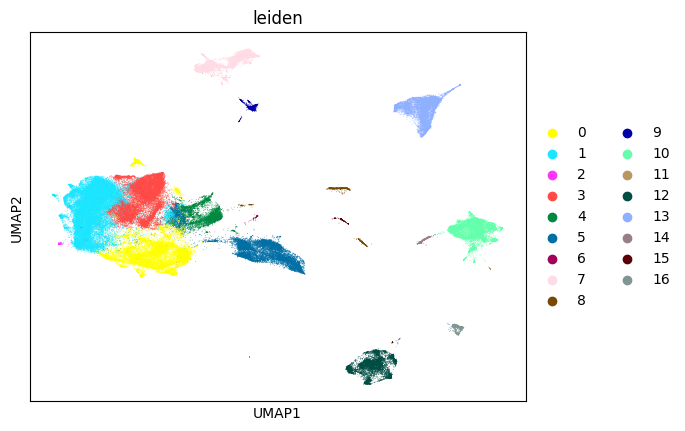

In [3]:
sc.pl.umap(adata, color="leiden")

In [22]:
annot={
	"0": "Epithelial",
	"1": "Epithelial",
	"2": "Epithelial",
	"3": "Epithelial",
	"4": "Epithelial",
	"5": "Epithelial",
	"6": "Normal Duct",
	"7": "Fibroblasts",
	"8": "Acinar Cells",
	"9": "Fibroblasts",
	"10": "Macrophages",
	"11": "Epithelial",
	"12": "T Cells",
	"13": "Granulocytes",
	"14": "Macrophages",
	"15": "Cycling",
	"16": "B Cells"
}

In [23]:
adata.obs["annot"]=adata.obs["leiden"].map(annot)

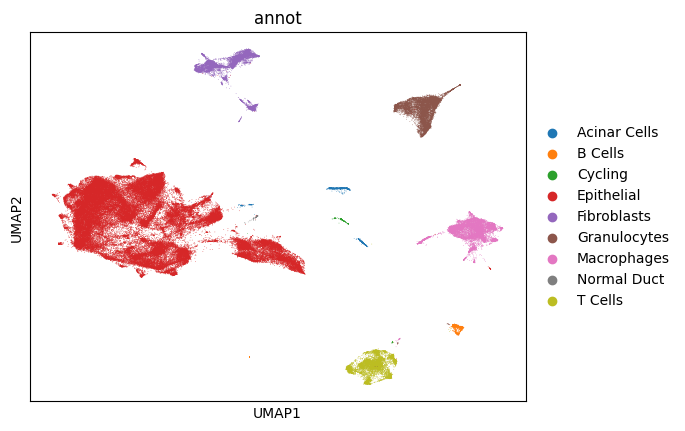

In [24]:
sc.pl.umap(adata, color="annot")